# A signal bank

The `SignalBank` class encapsulates the signal generation code and yields a dictionary with a number of signals. In order to access those signals, the keys of this dictionary are called `signal_id`. The constructor simply takes the number `N` of samples of the desired signals.

In [1]:
import numpy as np
from numpy import pi as pi
from matplotlib import pyplot as plt
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank

C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-eusipco\src\benchmark_demo\utilstf.py:95: ComplexWarning: Casting complex values to real discards the imaginary part
  x[icol]=x[icol]+tfr[indices,tj]*window[Lh+tau]
C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-eusipco\src\benchmark_demo\SignalBank.py:1181: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))
C:\Users\juan_\Nextcloud\Miramont_Juan\python_code\benchmark-eusipco\src\benchmark_demo\SignalBank.py:1369: RuntimeWarning: divide by zero encountered in divide
  e = np.exp(-alfa*np.arange(tt))*((np.arange(tt)-c)**2/np.arange(tt))


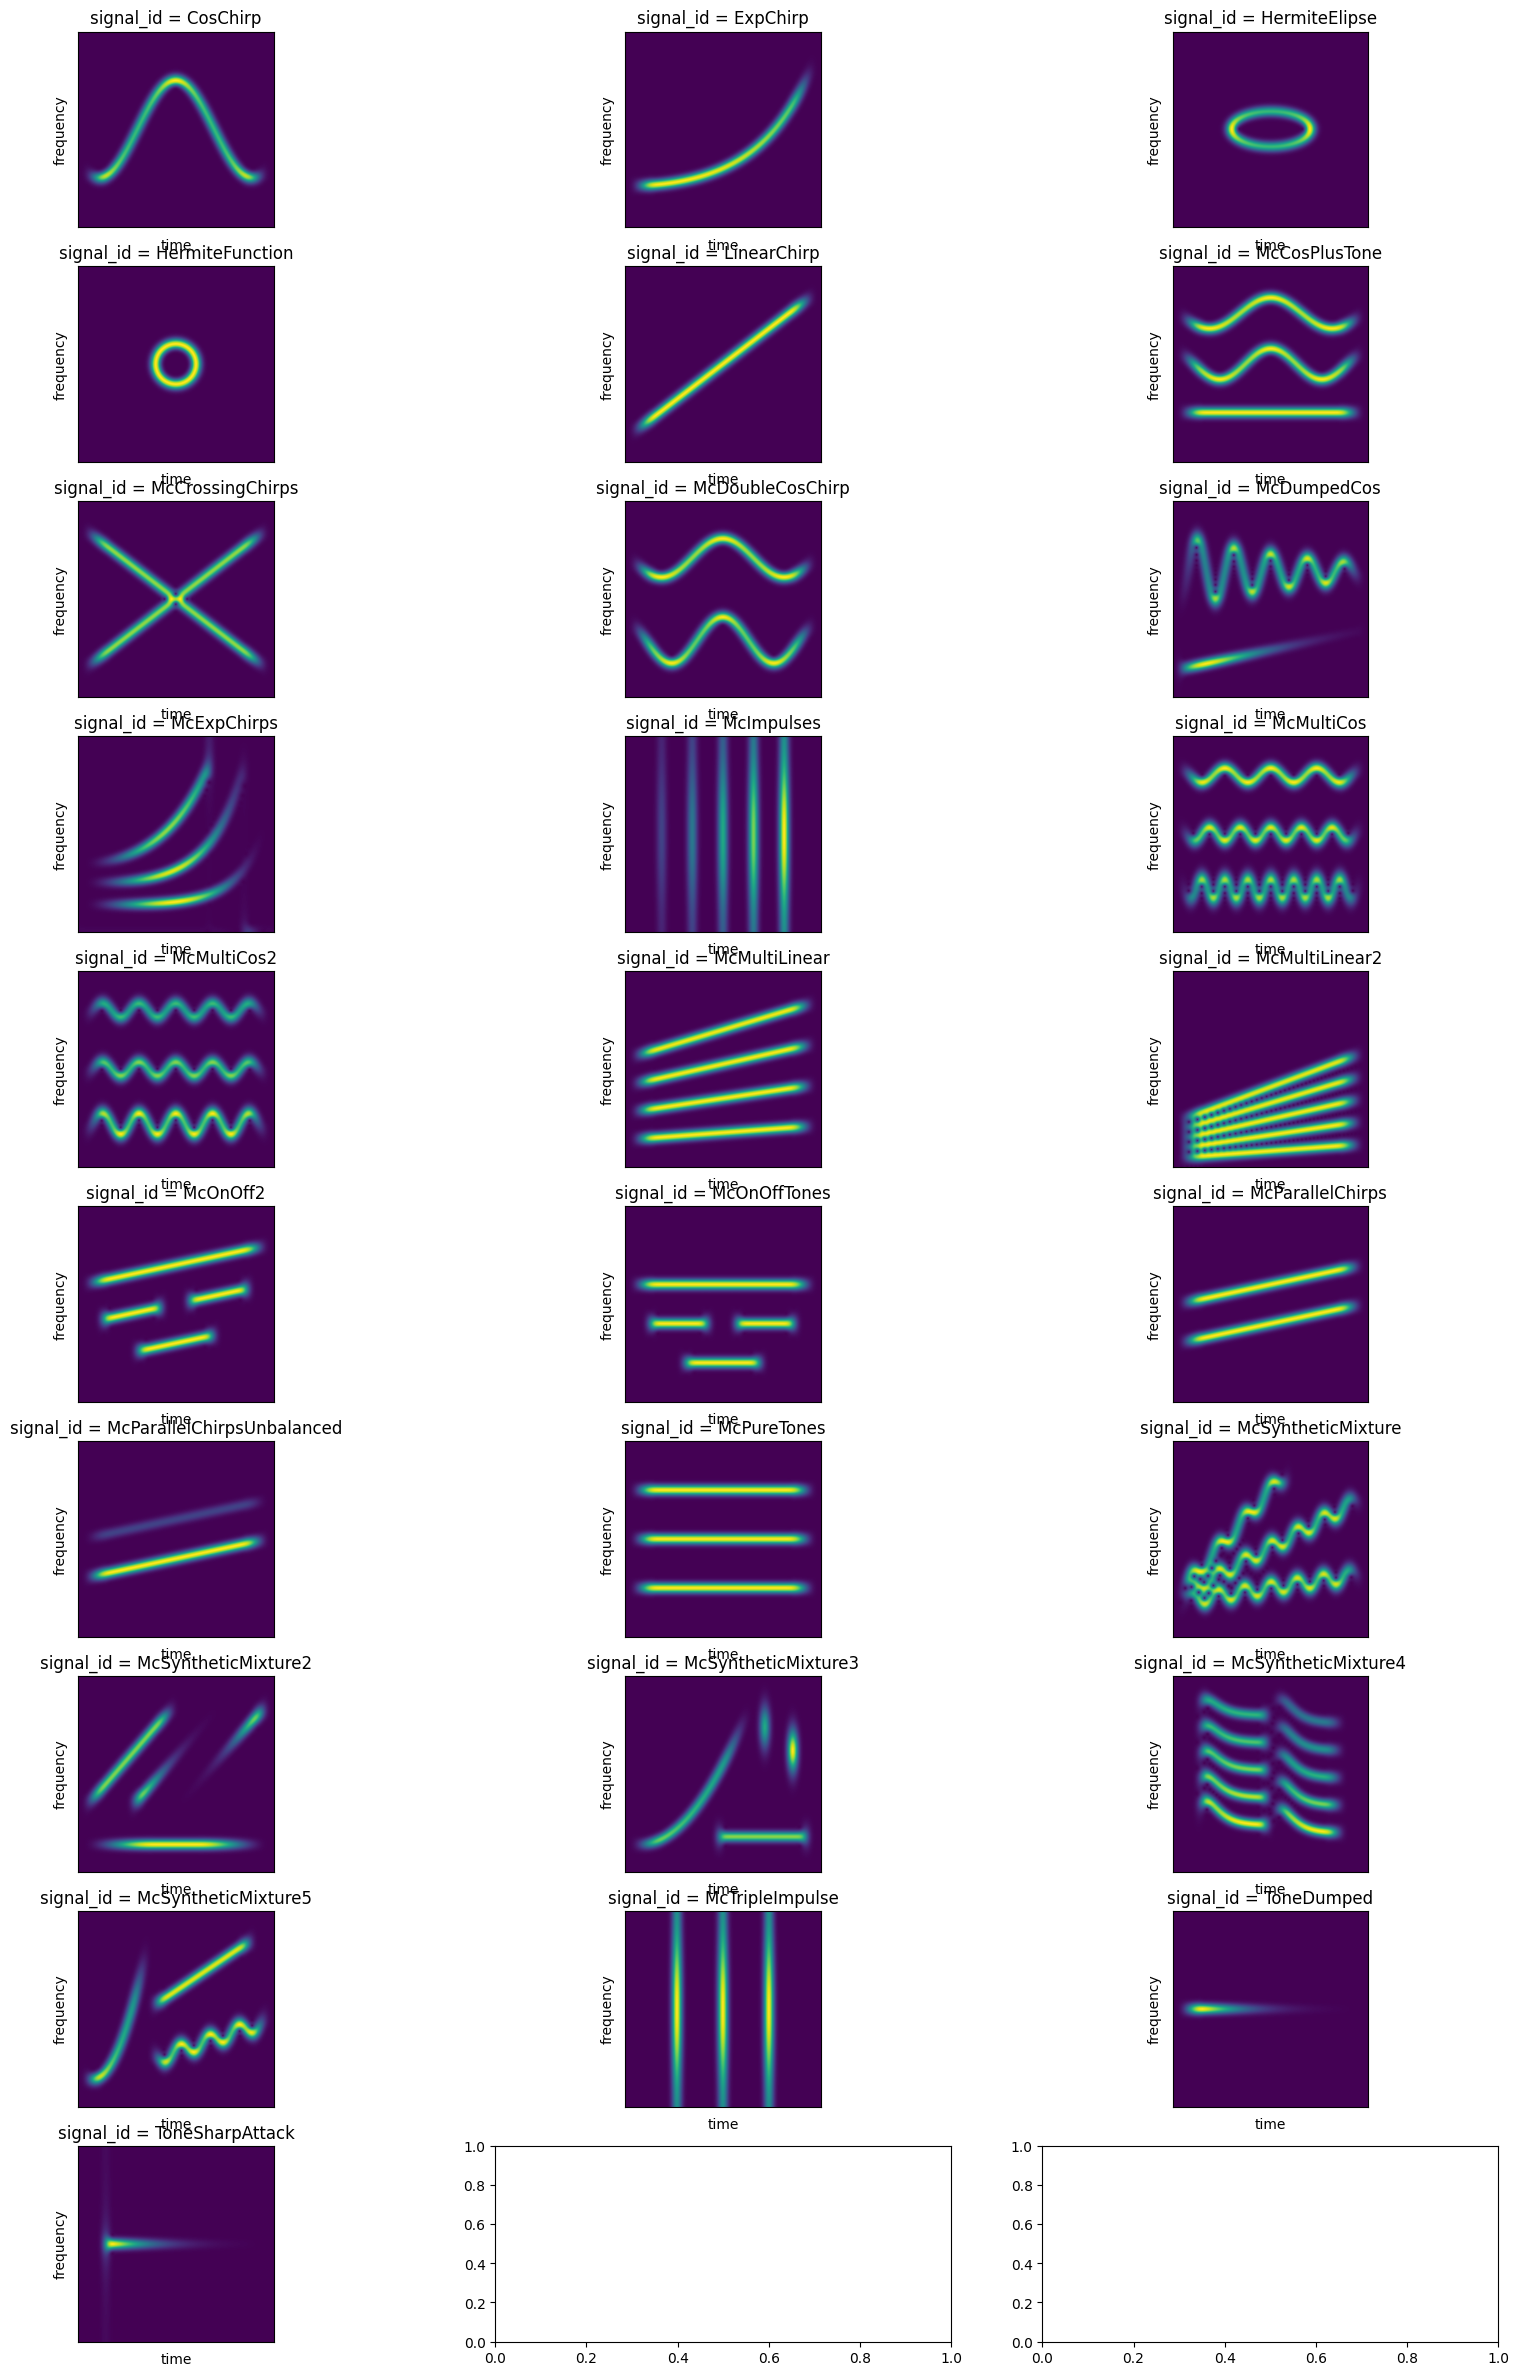

In [2]:
N = 1024
signal_bank = SignalBank(N=N, return_signal=True)
signals_dic = signal_bank.signalDict

number_of_signals = len(signals_dic.keys())
# nplots = int(np.ceil(np.sqrt(number_of_signals)))
# print(nplots)
fig, ax = plt.subplots(10, 3, figsize = (20,30))

for i,signal_id in enumerate(signals_dic):
    signal = signals_dic[signal_id]()
    S, stft = get_spectrogram(signal)
    stft = stft[0:N+1,:]
    idx = np.unravel_index(i, ax.shape)
    
    ax[idx].imshow(abs(stft), origin = 'lower')
    
    # Uncomment for instf and number of components
    # [ax[idx].plot(instf*2*N,'--r') for instf in signal.instf]
    # ax[idx].text(N//2,N//2,str(signal.total_comps))

    ax[idx].set_title('signal_id = '+ signal_id)
    ax[idx].set_xticks([],[])
    ax[idx].set_xlabel('time')
    ax[idx].set_yticks([])
    ax[idx].set_ylabel('frequency')

## Controlling the signal's effective length inside the observation window

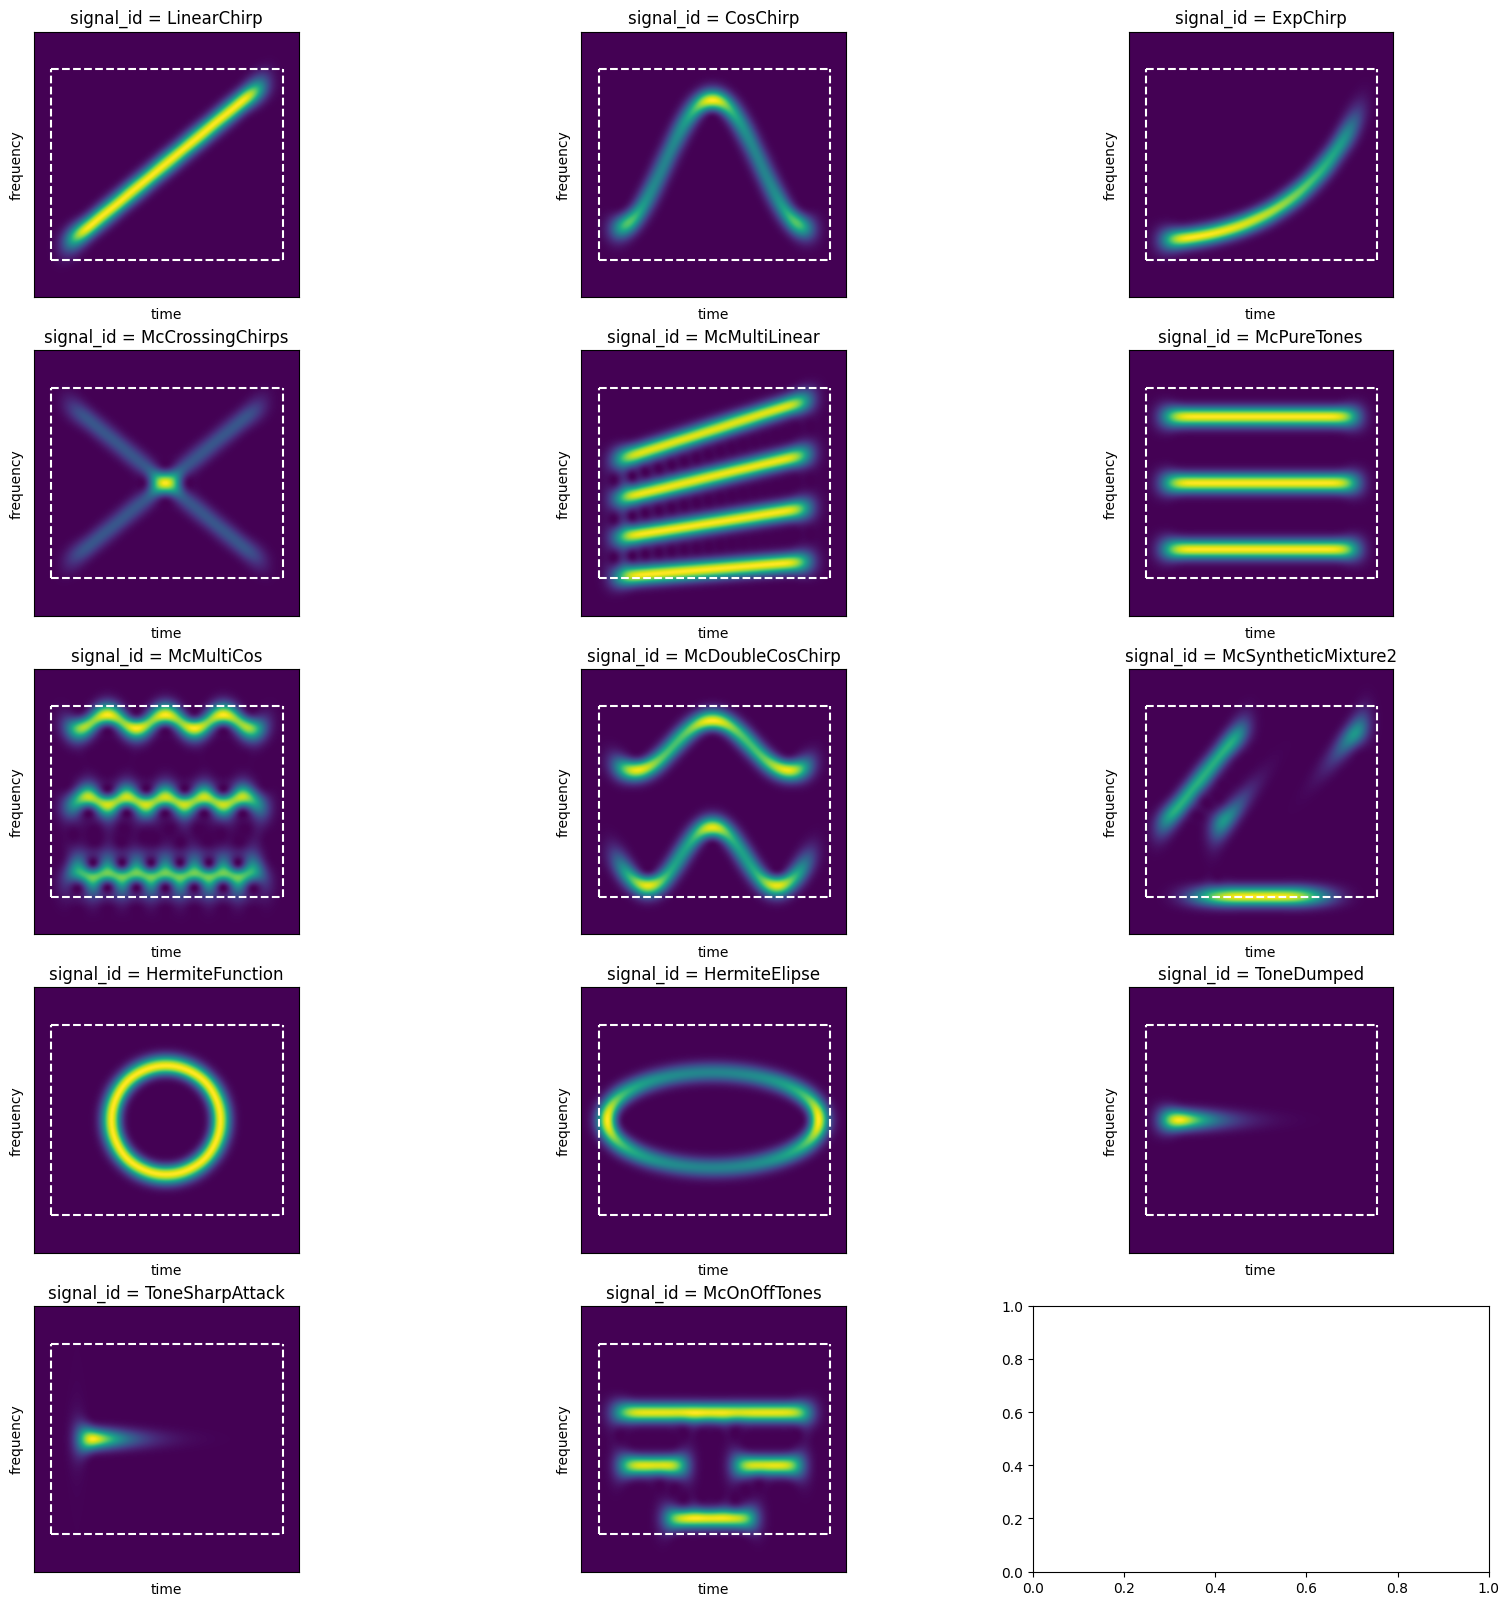

In [3]:
N = 256
signal_bank = SignalBank(N = N)
signals_dic = signal_bank.signalDict
fmin = signal_bank.fmin
fmax = signal_bank.fmax
tmin = signal_bank.tmin
tmax = signal_bank.tmax
Nfft = 2*N

signal_names = ['LinearChirp', 'CosChirp', 'ExpChirp', # Single-component signals
                'McCrossingChirps',                       # Crossing-components  
                'McMultiLinear','McPureTones',               # Multi-Component Harmonic signals  
                'McMultiCos','McDoubleCosChirp',    # Multi-Component Non-Harmonic  
                'McSyntheticMixture2',
                'HermiteFunction','HermiteElipse',        # Hermite type signals  
                'ToneDumped','ToneSharpAttack',           # Dumped and Sharps attacks  
                'McOnOffTones']                           # Modes that born and die

fig, ax = plt.subplots(5, 3, figsize = (20,20))

for i,signal_id in enumerate(signal_names):
    signal = signals_dic[signal_id]()
    S, _, = get_spectrogram(signal)
    idx = np.unravel_index(i, ax.shape)
    # print(idx)
    ax[idx].imshow(S, origin = 'lower')
    ax[idx].set_title('signal_id = '+ signal_id)
    ax[idx].set_xticks([],[])
    ax[idx].set_xlabel('time')
    ax[idx].set_yticks([])
    ax[idx].set_ylabel('frequency')
    ax[idx].plot([tmin, tmin],[fmin*Nfft, fmax*Nfft],'--w')
    ax[idx].plot([tmax, tmax],[fmin*Nfft, fmax*Nfft],'--w')
    ax[idx].plot([tmin, tmax],[fmin*Nfft, fmin*Nfft],'--w')
    ax[idx].plot([tmin, tmax],[fmax*Nfft, fmax*Nfft],'--w')                